<a href="https://colab.research.google.com/github/Kateriiina/Lesson/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn import datasets
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

In [8]:
def plot_on_dataset(X, y, ax, name):
    ax.set_title(name)
    X = MinMaxScaler().fit_transform(X)
    mlps = []
    if name == "breast_cancer":
        max_iter = 15
    else:
        max_iter = 400
    for label, param in zip(labels, params):
        print(f"Training model on dataset {name} with {label} method")
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
            mlp.fit(X, y)
        mlps.append(mlp)
        print(f"Training set score: {mlp.score(X, y)}")
        print(f"Training set loss: {mlp.loss_}")

    for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)

In [9]:
iris = datasets.load_iris()
X_cancer, y_cancer = datasets.load_breast_cancer(return_X_y=True)

params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "inv-scaling learning-rate", "adam"]
plot_args = [{'c': 'red', 'linestyle': '-'}, {'c': 'green', 'linestyle': '--'}, {'c': 'blue', 'linestyle': '-'}]

Training model on dataset iris with constant learning-rate method
Training set score: 0.98
Training set loss: 0.09694973433456033
Training model on dataset iris with inv-scaling learning-rate method
Training set score: 0.36
Training set loss: 0.9784438134721912
Training model on dataset iris with adam method
Training set score: 0.98
Training set loss: 0.04531108582830008
Training model on dataset breast_cancer with constant learning-rate method
Training set score: 0.9314586994727593
Training set loss: 0.3397406374914017
Training model on dataset breast_cancer with inv-scaling learning-rate method
Training set score: 0.7609841827768014
Training set loss: 0.6185272609090142
Training model on dataset breast_cancer with adam method
Training set score: 0.9666080843585237
Training set loss: 0.10488251246621044


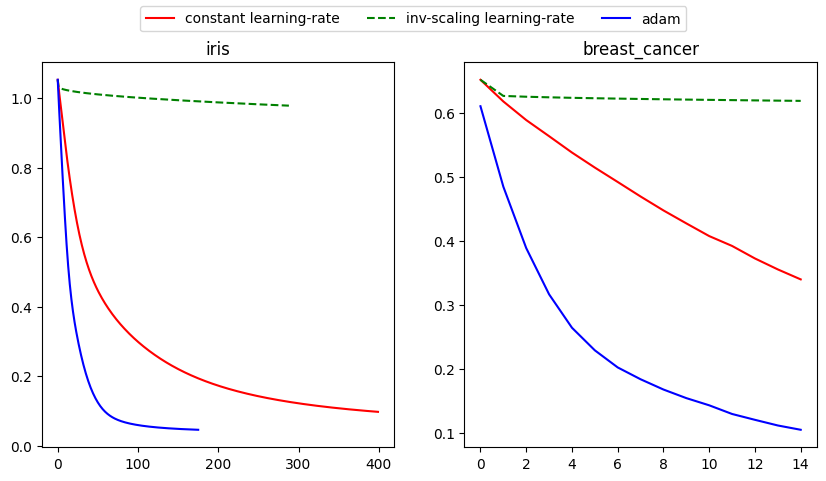

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
data_sets = [(iris.data, iris.target), (X_cancer, y_cancer)]

for ax, data, name in zip(axes.ravel(), data_sets, ['iris', 'breast_cancer']):
    plot_on_dataset(*data, ax=ax, name=name)

fig.legend(ax.get_lines(), labels, ncol=3, loc="upper center")
plt.show()